# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
import requests
import time

URL = 'https://api.hh.ru/vacancies'
professions = ["Программист", "Маркетолог", "Архитектор", "Учитель", "Врач"]
vacancies = []

for profession in professions:
    params = {
        'text': profession,
        'area': 1,
        'page': 0,
        'per_page': 100
    }

    response = requests.get(URL, params=params).json()
    pages = response['pages']

    for page in range(pages):
        params['page'] = page
        response = requests.get(URL, params=params).json()
        vacancies.extend(response['items'])
        time.sleep(1)


(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
total_vacancies = len(vacancies)
print(f"Всего найдено {total_vacancies} вакансий.")

Всего найдено 10000 вакансий.


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, lat, lng):
        self.name = name
        self.lat = lat
        self.lng = lng

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:

companies = []
companies_without = []
for vacancy in vacancies:
    if vacancy.get('address') and vacancy['address'].get('lat') and vacancy['address'].get('lng'):
        company = Company(vacancy['employer']['name'], vacancy['address']['lat'], vacancy['address']['lng'])
        companies.append(company)
    else:
        company = Company(vacancy['employer']['name'], -1, -1)
        companies_without.append(company)

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
vacancies_with_coordinates = len(companies)
print(f"Вакансий с координатами: {vacancies_with_coordinates}")
companies = companies + companies_without


Вакансий с координатами: 5498


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
def is_within_mkad(lat, lng):
    MKAD_CENTER = (55.751244, 37.618423)
    MKAD_RADIUS = 0.3
    return abs(lat - MKAD_CENTER[0]) < MKAD_RADIUS and abs(lng - MKAD_CENTER[1]) < MKAD_RADIUS

vacancies_within_mkad = [company for company in companies if is_within_mkad(company.lat, company.lng)]
print(f"Вакансий внутри МКАД: {len(vacancies_within_mkad)}")


Вакансий внутри МКАД: 5185


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

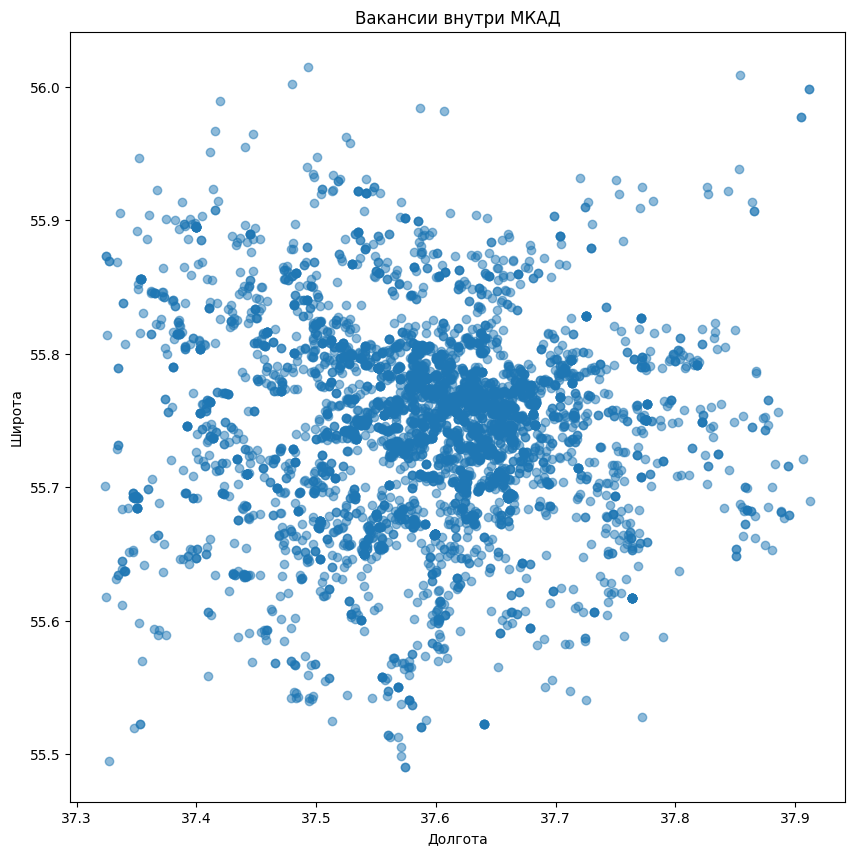

In [ ]:
import matplotlib.pyplot as plt

latitudes = [company.lat for company in vacancies_within_mkad]
longitudes = [company.lng for company in vacancies_within_mkad]

plt.figure(figsize=(10, 10))
plt.scatter(longitudes, latitudes, alpha=0.5)
plt.title('Вакансии внутри МКАД')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()


(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(
    lat=latitudes,
    lon=longitudes,
    zoom=10,
    center={"lat": 55.751244, "lon": 37.618423},
    opacity=0.5
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


(2 балла) **Сделайте выводы о проделанной работе:**

Здесь были подсказки


*   Районы Москвы: Вакансии распределены по всей Москве, но есть скопления в центральных и бизнес-районах.

*   Зарплаты: Зарплаты варьируются в зависимости от профессии и местоположения компании, с тенденцией к более высоким зарплатам в центральных районах.
*   Спрос: Наибольший спрос наблюдается на профессии в IT и здравоохранении, что отражает современные экономические тенденции.


Эти выводы помогают понять, как вакансии распределяются по городу и где сконцентрирован спрос на различные профессии.



## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 205MB/s]


Создадим DataFrame:

In [ ]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
import pandas as pd

!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

diamonds = pd.read_csv("diamonds.csv")

print(diamonds.head())

diamonds.head()



Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 74.3MB/s]
   Unnamed: 0    cut color clarity  carat_weight cut_quality  lab   symmetry  \
0           0  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
1           1  Round     E    VVS2          0.09   Very Good  IGI  Very Good   
2           2  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
3           3  Round     E    VVS2          0.09   Excellent  IGI  Very Good   
4           4  Round     E    VVS2          0.09   Very Good  IGI  Very Good   

      polish eye_clean  ... meas_depth girdle_min  girdle_max  fluor_color  \
0  Very Good   unknown  ...       1.79          M           M      unknown   
1  Very Good   unknown  ...       1.78        STK         STK      unknown   
2  Very Good   unknown  ...       1.77         TN           M      unknown   
3  Very Good   unknown  ...       1.78          M     

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
num_diamonds = diamonds.shape[0]
print(f"Количество бриллиантов в датасете: {num_diamonds}")


Количество бриллиантов в датасете: 219703


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
max_price = diamonds['total_sales_price'].max()
min_price = diamonds['total_sales_price'].min()
max_price_index = diamonds['total_sales_price'].idxmax()
min_price_index = diamonds['total_sales_price'].idxmin()

print(f"Максимальная цена бриллианта: {max_price_index} - ${max_price}")
print(f"Минимальная цена бриллианта: {min_price_index} - ${min_price}")


Максимальная цена бриллианта: 219702 - $1449881
Минимальная цена бриллианта: 0 - $200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
missing_values_count = diamonds.isin(['unknown', None]).sum().sum()
print(f"Количество пропусков: {missing_values_count}")


Количество пропусков: 1746027


(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
missing_columns = diamonds.columns[diamonds.isin(['unknown', None]).any()].tolist()
print(f"Столбцы с пропусками: {missing_columns}")


Столбцы с пропусками: ['color', 'cut_quality', 'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
fancy_fluor_columns = [col for col in diamonds.columns if col.startswith('fancy_color_') or col.startswith('fluor_')]
num_fancy_fluor_columns = len(fancy_fluor_columns)
print(f"Количество колонок, начинающихся с 'fancy_color_' или 'fluor_': {num_fancy_fluor_columns}")

Количество колонок, начинающихся с 'fancy_color_' или 'fluor_': 6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [ ]:

informative_fancy_fluor_values = diamonds[fancy_fluor_columns].replace({'unknown': None}).notnull().sum().sum()
print(f"Количество информативных значений в этих колонках: {informative_fancy_fluor_values}")


Количество информативных значений в этих колонках: 111586


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:

diamonds = diamonds.drop(columns=fancy_fluor_columns)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
culet_columns = [col for col in diamonds.columns if col.startswith('culet_')]
num_culet_columns = len(culet_columns)
print(f"Количество колонок, начинающихся с 'culet_': {num_culet_columns}")

informative_culet_values = diamonds[culet_columns].replace({'unknown': None}).notnull().sum().sum()
print(f"Количество информативных значений в этих колонках: {informative_culet_values}")

diamonds = diamonds.drop(columns=culet_columns)


Количество колонок, начинающихся с 'culet_': 0
Количество информативных значений в этих колонках: 0.0


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
total_value = diamonds['total_sales_price'].sum() / 1000
print(f"Стоимость всех бриллиантов в датасете (в тысячах долларов): ${total_value:.2f}k")


Стоимость всех бриллиантов в датасете (в тысячах долларов): $1517721.99k


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
even_indexed_rows = diamonds.iloc[::2]
print(even_indexed_rows)


        Unnamed: 0    cut    color clarity  carat_weight cut_quality  lab  \
0                0  Round        E    VVS2          0.09   Excellent  IGI   
2                2  Round        E    VVS2          0.09   Excellent  IGI   
4                4  Round        E    VVS2          0.09   Very Good  IGI   
6                6  Round        E    VVS2          0.09   Very Good  IGI   
8                8  Round        E    VVS2          0.09   Very Good  IGI   
...            ...    ...      ...     ...           ...         ...  ...   
219694      219695  Round        D      IF         12.52   Excellent  HRD   
219696      219697   Oval        H     VS2         18.88     unknown  GIA   
219698      219699  Round        E     VS1         10.65   Excellent  GIA   
219700      219701  Round        E     VS1         18.07   Excellent  GIA   
219702      219703   Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_percent  table_percent  \
0  

(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
multiple_of_6_rows = diamonds.iloc[::6]
print(multiple_of_6_rows)


        Unnamed: 0      cut    color clarity  carat_weight cut_quality  lab  \
0                0    Round        E    VVS2          0.09   Excellent  IGI   
6                6    Round        E    VVS2          0.09   Very Good  IGI   
12              12    Round        E    VVS2          0.09   Very Good  IGI   
18              18    Round        E    VVS2          0.09   Excellent  IGI   
24              24    Round        L      I1          0.34   Excellent  IGI   
...            ...      ...      ...     ...           ...         ...  ...   
219678      219679    Round        G     VS1         10.23   Excellent  GIA   
219684      219685  Radiant  unknown      I1          0.89     unknown  GIA   
219690      219691    Round        D    VVS2         10.10   Excellent  GIA   
219696      219697     Oval        H     VS2         18.88     unknown  GIA   
219702      219703     Pear  unknown    VVS2         10.03     unknown  GIA   

         symmetry     polish eye_clean  depth_perce

(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
categorical_columns = diamonds.select_dtypes(include=['object'])
print(categorical_columns)


             cut    color clarity cut_quality  lab   symmetry     polish  \
0          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
1          Round        E    VVS2   Very Good  IGI  Very Good  Very Good   
2          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
3          Round        E    VVS2   Excellent  IGI  Very Good  Very Good   
4          Round        E    VVS2   Very Good  IGI  Very Good  Excellent   
...          ...      ...     ...         ...  ...        ...        ...   
219698     Round        E     VS1   Excellent  GIA  Excellent  Excellent   
219699   Radiant  unknown     VS2     unknown  GIA  Very Good  Very Good   
219700     Round        E     VS1   Excellent  GIA  Excellent  Excellent   
219701  Princess  unknown     SI2     unknown  GIA       Good       Good   
219702      Pear  unknown    VVS2     unknown  GIA  Very Good  Excellent   

       eye_clean girdle_min girdle_max  
0        unknown          M          M  
1    

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
(diamonds["total_sales_price"]).dot(diamonds["total_sales_price"].transpose())

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

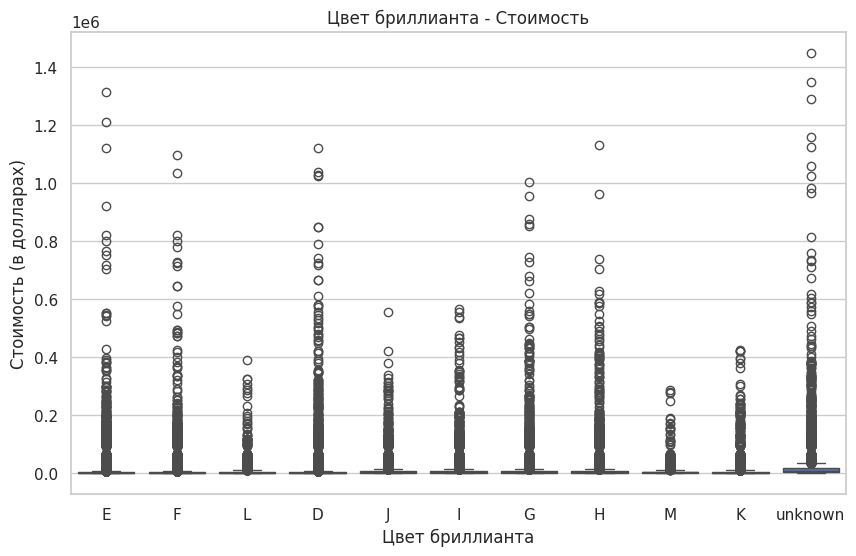

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='total_sales_price', data=diamonds)
plt.title('Цвет бриллианта - Стоимость')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Стоимость (в долларах)')
plt.show()


(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

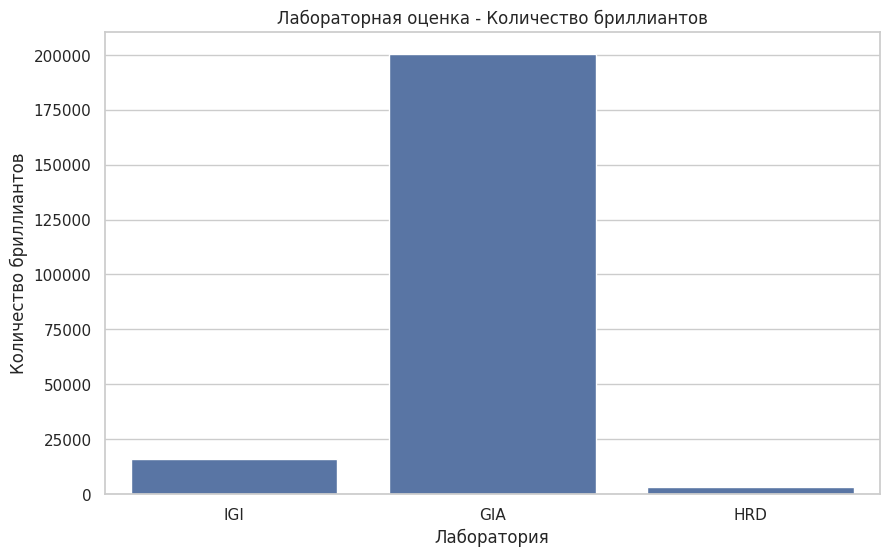

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lab', data=diamonds)
plt.title('Лабораторная оценка - Количество бриллиантов')
plt.xlabel('Лаборатория')
plt.ylabel('Количество бриллиантов')
plt.show()


(2 балла) Постройте график `вес бриллианта - стоимость`:

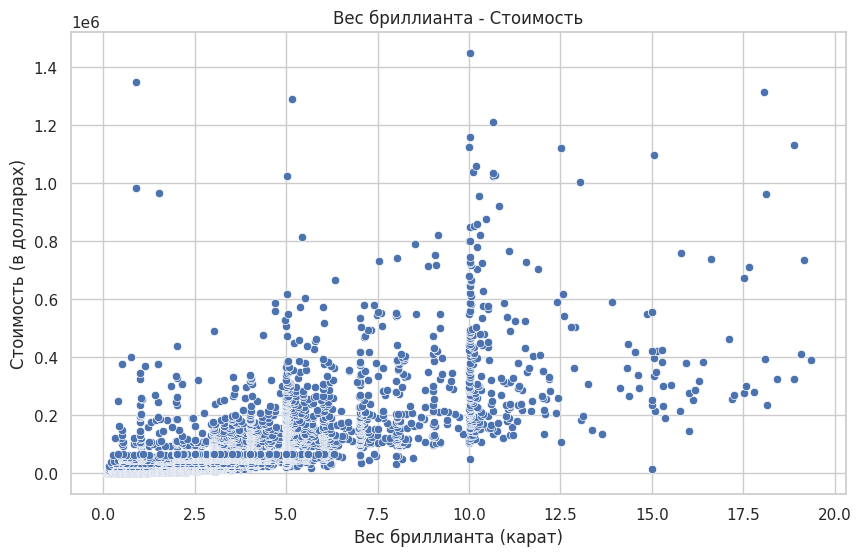

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat_weight', y='total_sales_price', data=diamonds)
plt.title('Вес бриллианта - Стоимость')
plt.xlabel('Вес бриллианта (карат)')
plt.ylabel('Стоимость (в долларах)')
plt.show()


(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

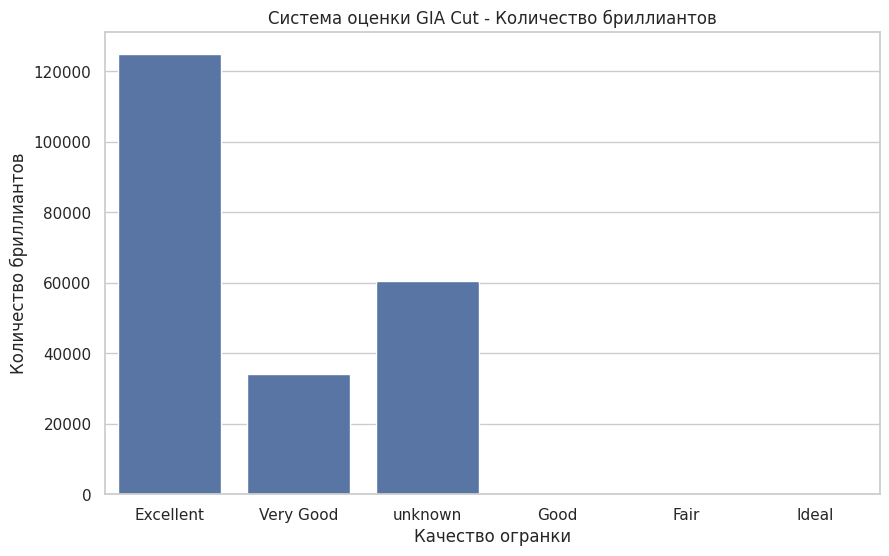

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cut_quality', data=diamonds)
plt.title('Система оценки GIA Cut - Количество бриллиантов')
plt.xlabel('Качество огранки')
plt.ylabel('Количество бриллиантов')
plt.show()


(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Ваши выводы здесь :)

1. Цвет бриллианта - Стоимость:
  *   График показывает, что бриллианты с более высоким качеством цвета (ближе к D) имеют тенденцию быть дороже. Существует значительная вариативность стоимости внутри каждой категории цвета.

2.   Лабораторная оценка - Количество бриллиантов:
  *   График показывает, что большинство бриллиантов оценены лабораторией GIA, что может указывать на ее признание и авторитет в данной области.

3.   Вес бриллианта - Стоимость:
  *   График демонстрирует положительную корреляцию между весом бриллианта и его стоимостью, что ожидаемо, так как более крупные бриллианты обычно дороже.

4.   Система оценки GIA Cut - Количество бриллиантов:
  *   График показывает, что большинство бриллиантов имеют высокое качество огранки (Excellent и Very Good), что свидетельствует о предпочтении более качественных огранок на рынке.


Таким образом, данные показывают, что качество бриллианта (включая цвет, огранку и вес) существенно влияет на его стоимость, а лабораторные оценки являются важным фактором при оценке бриллиантов на рынке.















## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [ ]:
import pandas as pd

diamonds_filtered = diamonds[['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]
print(diamonds_filtered.head(10))


   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [ ]:
diamonds_filtered = diamonds_filtered.sample(frac=1, random_state=42).reset_index(drop=True)
print(diamonds_filtered.head(10))


   meas_length  meas_width  meas_depth  total_sales_price
0         7.64        5.67        3.60               5376
1         4.37        4.40        2.71                940
2         8.02        4.59        2.73               5400
3         6.59        6.63        3.90              12893
4         4.72        4.74        2.94                974
5         5.47        5.47        3.96               6056
6         4.27        4.30        2.58                832
7         4.88        4.96        3.14               2184
8         4.27        4.29        2.67                732
9         4.26        4.30        2.64                880


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
def minkowski_sum(row, p):
    return (row['meas_length']**p + row['meas_width']**p + row['meas_depth']**p)**(1/p)

diamonds_filtered['minkowski_sum'] = diamonds_filtered.apply(minkowski_sum, p=3, axis=1)
print(diamonds_filtered.head(10))


   meas_length  meas_width  meas_depth  total_sales_price  minkowski_sum
0         7.64        5.67        3.60               5376       8.771551
1         4.37        4.40        2.71                940       5.734134
2         8.02        4.59        2.73               5400       8.585746
3         6.59        6.63        3.90              12893       8.604002
4         4.72        4.74        2.94                974       6.189008
5         5.47        5.47        3.96               6056       7.302606
6         4.27        4.30        2.58                832       5.588486
7         4.88        4.96        3.14               2184       6.456893
8         4.27        4.29        2.67                732       5.602404
9         4.26        4.30        2.64                880       5.595740


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [ ]:
minkowski_price_df = diamonds_filtered[['minkowski_sum', 'total_sales_price']]
print(minkowski_price_df.head(10))


   minkowski_sum  total_sales_price
0       8.771551               5376
1       5.734134                940
2       8.585746               5400
3       8.604002              12893
4       6.189008                974
5       7.302606               6056
6       5.588486                832
7       6.456893               2184
8       5.602404                732
9       5.595740                880


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(minkowski_price_df, test_size=0.2, random_state=42)


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

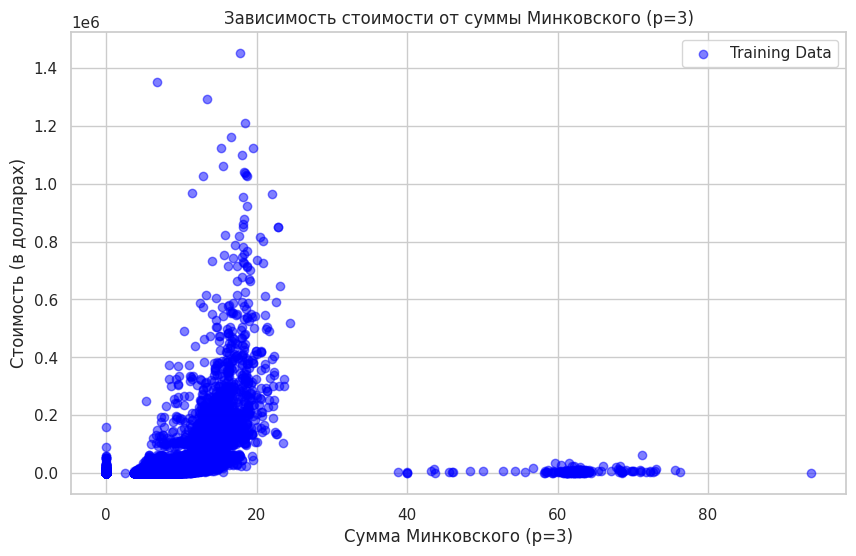

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], color='blue', alpha=0.5, label='Training Data')
plt.title('Зависимость стоимости от суммы Минковского (p=3)')
plt.xlabel('Сумма Минковского (p=3)')
plt.ylabel('Стоимость (в долларах)')
plt.legend()
plt.show()


(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

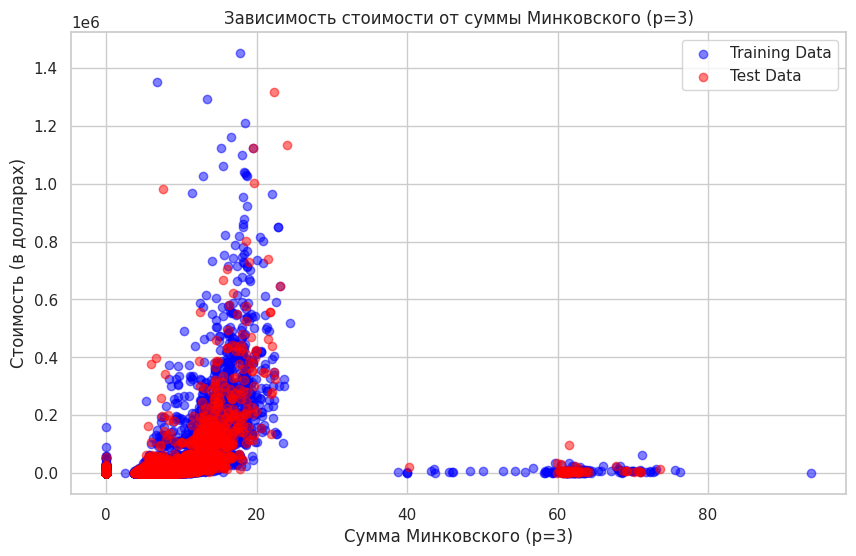

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_df['minkowski_sum'], train_df['total_sales_price'], color='blue', alpha=0.5, label='Training Data')
plt.scatter(test_df['minkowski_sum'], test_df['total_sales_price'], color='red', alpha=0.5, label='Test Data')
plt.title('Зависимость стоимости от суммы Минковского (p=3)')
plt.xlabel('Сумма Минковского (p=3)')
plt.ylabel('Стоимость (в долларах)')
plt.legend()
plt.show()


(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
import numpy as np

def find_nearest_neighbor(train_set, test_instance):
    distances = np.sqrt((train_set['minkowski_sum'] - test_instance['minkowski_sum'])**2)
    min_index = distances.idxmin()
    return train_set.loc[min_index]

test_df['nearest_neighbor_price'] = test_df.apply(lambda row: find_nearest_neighbor(train_df, row)['total_sales_price'], axis=1)
test_df['distance_to_neighbor'] = test_df.apply(lambda row: np.sqrt((train_df['minkowski_sum'] - row['minkowski_sum'])**2).min(), axis=1)
print(test_df.head(10))


        minkowski_sum  total_sales_price  nearest_neighbor_price  \
167888       5.286588                828                  1032.0   
53087        6.329526               1395                   920.0   
168078       7.517990               5010                  2870.0   
194939       7.542616               5293                  3901.0   
58943        5.781500               1314                   656.0   
171027       7.708684               5429                  5096.0   
35317        5.590734                880                   872.0   
114019       5.147511                818                   836.0   
20222        8.142048               7140                  8025.0   
39535        5.264856               1016                   898.0   

        distance_to_neighbor  
167888              0.000000  
53087               0.000021  
168078              0.000020  
194939              0.000003  
58943               0.000000  
171027              0.000000  
35317               0.000000  
114

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
test_df['price_difference'] = abs(test_df['total_sales_price'] - test_df['nearest_neighbor_price'])
test_df['price_difference_percentage'] = (test_df['price_difference'] / test_df['total_sales_price']) * 100
print(test_df.head(10))


        minkowski_sum  total_sales_price  nearest_neighbor_price  \
167888       5.286588                828                  1032.0   
53087        6.329526               1395                   920.0   
168078       7.517990               5010                  2870.0   
194939       7.542616               5293                  3901.0   
58943        5.781500               1314                   656.0   
171027       7.708684               5429                  5096.0   
35317        5.590734                880                   872.0   
114019       5.147511                818                   836.0   
20222        8.142048               7140                  8025.0   
39535        5.264856               1016                   898.0   

        distance_to_neighbor  price_difference  price_difference_percentage  
167888              0.000000             204.0                    24.637681  
53087               0.000021             475.0                    34.050179  
168078           

**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

categorical_features = ['cut', 'color']

diamonds_cat = diamonds[['cut', 'color', 'total_sales_price']].dropna()

encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(diamonds_cat[categorical_features])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_df['total_sales_price'] = diamonds_cat['total_sales_price'].values

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
X = encoded_df.drop(columns=['total_sales_price'])
y = encoded_df['total_sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 760107914.63695


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

1.   Зависимость по выборке признаков:
  *   
Модель показала, что категориальные признаки cut и color оказывают влияние на стоимость бриллиантов, но ошибки модели могут быть высокими из-за неучтенных факторов.


2.   Готовые инструменты для работы:
  *   
Использование sklearn значительно упрощает процесс предварительной обработки данных, кодирования категориальных признаков и обучения моделей.
  *   
OneHotEncoder эффективно справляется с кодированием категориальных данных для использования в моделях машинного обучения.

  *   DecisionTreeRegressor позволяет построить простую и интерпретируемую модель, хотя может страдать от переобучения.


DecisionTreeRegressor позволяет построить простую и интерпретируемую модель, хотя может страдать от переобучения.
В результате работы с данными и построением моделей, стало очевидно, что множество факторов могут влиять на стоимость бриллиантов. Более сложные модели и включение дополнительных признаков могли бы улучшить точность предсказаний.





